In [1]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
!pip3 install isodate 
!pip3 install wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sevadaaghasyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# API

In [2]:
youtube = build('youtube', 'v3', developerKey='AIz...')

In [3]:
# Define the playlist ID for the channel
PlaylistID = "PLrAXtmErZgOdP_8GztsuKi9nrraNbKKp4"
# Define a function to retrieve the video IDs for a given playlist
def vdids(youtube, playlist_id):
    videoids = []
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults=125)
    response = request.execute()
    for item in response['items']:
        videoids.append(item['contentDetails']['videoId'])
    return videoids
 
# Call the vdids function to retrieve the video IDs for the given playlist
video_ids = vdids(youtube, PlaylistID)
print(video_ids)

['CVx9IB_U9X4', 'DcWqzZ3I2cY', 'CGiDqhSdLHk', 'VPaOy3G1-2A', '2yHr9DPnSzk', 'r4wLXNydzeY', 'JN3KPFbWCy8', 'co_MeKSnyAo', 'MVYrJJNdrEg', 'buarAx_u2qg', 'fUEjCXpOjPY', 'aGOV5R7M1Js', 'XbPHojL_61U', 'eTBAxD6lt2g', 'e8qJsk1j2zE', '34wA_bdG6QQ', 'Mde2q7GFCrw', 'XpC7SVDXimg', 'NPtBkw5uD-0', 'dNrTrx42DGQ', '-hxeDjAxvJ8', 'diJp4zoQPqo', '8qgIFD0PaWo', 'Ff4fRgnuFgQ', '8TmV6KEYkK0', 'pdJQ8iVTwj8', 'YDjOS0VHEr4', 'iFXGpKf9VBU', 'IQnUa5Bq5x4', 'DgTjSrrf6GQ', 'PdE-waSx-d8', '2i31fDkaK9A', 'cLVdsZ3I5os', 'wMavKrA-4do', 'OgIo36F6Fsg', 'VcVfceTsD0A', 'Osh0-J3T2nY', 'gPfriiHBBek', 'AaTRHFaaPG8', 'L_Guz73e6fw', 'qtOKrG_wK5A', 'Qyrjgf-_Vdk', '8EguLJgkc54', 'hLZ6PACCBy8', 'XiCxj-bXu5M', 'J1lN9zkK_k0', 'GkZz2I6sK08', 'y3cw_9ELpQw', 'cFSrxSBrgSc', 'jRBksDVs4tg']


In [4]:
def vdids(youtube, playlist_id):
    videoids = []
    nextPageToken = None

    while True:
        request = youtube.playlistItems().list(
            part="snippet,contentDetails",
            playlistId=playlist_id,
            maxResults=100,
            pageToken=nextPageToken
        )
        response = request.execute()

        for item in response['items']:
            videoids.append(item['contentDetails']['videoId'])

        nextPageToken = response.get('nextPageToken')

        if not nextPageToken:
            break

    return videoids

# Call the vdids function to retrieve all video IDs for the given playlist
video_ids = vdids(youtube, PlaylistID)
print(video_ids)

['CVx9IB_U9X4', 'DcWqzZ3I2cY', 'CGiDqhSdLHk', 'VPaOy3G1-2A', '2yHr9DPnSzk', 'r4wLXNydzeY', 'JN3KPFbWCy8', 'co_MeKSnyAo', 'MVYrJJNdrEg', 'buarAx_u2qg', 'fUEjCXpOjPY', 'aGOV5R7M1Js', 'XbPHojL_61U', 'eTBAxD6lt2g', 'e8qJsk1j2zE', '34wA_bdG6QQ', 'Mde2q7GFCrw', 'XpC7SVDXimg', 'NPtBkw5uD-0', 'dNrTrx42DGQ', '-hxeDjAxvJ8', 'diJp4zoQPqo', '8qgIFD0PaWo', 'Ff4fRgnuFgQ', '8TmV6KEYkK0', 'pdJQ8iVTwj8', 'YDjOS0VHEr4', 'iFXGpKf9VBU', 'IQnUa5Bq5x4', 'DgTjSrrf6GQ', 'PdE-waSx-d8', '2i31fDkaK9A', 'cLVdsZ3I5os', 'wMavKrA-4do', 'OgIo36F6Fsg', 'VcVfceTsD0A', 'Osh0-J3T2nY', 'gPfriiHBBek', 'AaTRHFaaPG8', 'L_Guz73e6fw', 'qtOKrG_wK5A', 'Qyrjgf-_Vdk', '8EguLJgkc54', 'hLZ6PACCBy8', 'XiCxj-bXu5M', 'J1lN9zkK_k0', 'GkZz2I6sK08', 'y3cw_9ELpQw', 'cFSrxSBrgSc', 'jRBksDVs4tg', '5eK5A_43pkE', 'uZN5xjoS6TU', 'GvX-heRWFfA', 'aJoRMFWn2Jk', 'BOKCNUqbpH0', 'Z3_PwvvfxIU', 'NXU_M4030nE', 'pNlfHgHJweQ', 'yyBosLx7bbM', 'NUkXluf3OYA', '9PIOoJMMptA', 'hi9Rf0oLdHk', '2oHH4aClJQs', 'FhfmGM6hswI', 'H9AAnV59ddE', '-DVyjdw4t9I', '4KiO8GRg

In [5]:
def getvid_details(youtube, video_ids):
    all_info = []

    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute()

        for video in response['items']:
            keepstats = {
                'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                'statistics': ['viewCount', 'likeCount', 'favoriteCount', 'commentCount'],
                'contentDetails': ['duration', 'definition', 'caption']
            }
            video_info = {'video_id': video['id']}

            for k in keepstats.keys():
                for v in keepstats[k]:
                    try:
                        video_info[v] = video[k][v]
                    except KeyError:
                        video_info[v] = None

            all_info.append(video_info)

    return pd.DataFrame(all_info)

# Assuming you have already defined youtube and video_ids
video_details_df = getvid_details(youtube, video_ids)

In [6]:
video_data=getvid_details(youtube,video_ids)
video_data.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,CVx9IB_U9X4,Lex Fridman,"Teddy Atlas: Mike Tyson, Cus D'Amato, Boxing, ...",Teddy Atlas is boxing trainer to 18 world cham...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-24T21:29:15Z,231052,5493,0,855,PT2H9M9S,hd,false
1,DcWqzZ3I2cY,Lex Fridman,Jeff Bezos: Amazon and Blue Origin | Lex Fridm...,Jeff Bezos is the founder of Amazon and Blue O...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-14T17:53:21Z,2824358,72396,0,9092,PT2H11M32S,hd,true
2,CGiDqhSdLHk,Lex Fridman,Lee Cronin: Controversial Nature Paper on Evol...,Lee Cronin is a chemist at University of Glasg...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-09T21:14:54Z,727553,8417,0,1465,PT3H19M22S,hd,true
3,VPaOy3G1-2A,Lex Fridman,"Lisa Randall: Dark Matter, Theoretical Physics...",Lisa Randall is a theoretical physicist at Har...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-03T16:57:57Z,365621,8522,0,1008,PT59M25S,hd,true
4,2yHr9DPnSzk,Lex Fridman,Michael Malice: Thanksgiving Pirate Special | ...,"Michael Malice is a political thinker, podcast...","[agi, ai, ai podcast, artificial intelligence,...",2023-11-25T20:41:38Z,440596,10545,0,1523,PT1H39M2S,hd,true


In [7]:
num_cols=['viewCount','likeCount','favoriteCount','commentCount']
video_data[num_cols]=video_data[num_cols].apply(pd.to_numeric,errors='coerce',axis=1)

In [8]:
import isodate
video_data['durationSec'] = video_data['duration'].apply(lambda x: isodate.parse_duration(x))
video_data[['duration','durationSec']]

,duration,durationSec
0,PT2H9M9S,0 days 02:09:09
1,PT2H11M32S,0 days 02:11:32
2,PT3H19M22S,0 days 03:19:22
3,PT59M25S,0 days 00:59:25
4,PT1H39M2S,0 days 01:39:02
...,...,...
395,PT54M3S,0 days 00:54:03
396,PT42M19S,0 days 00:42:19
397,PT37M54S,0 days 00:37:54
398,PT57M54S,0 days 00:57:54


In [9]:
import datetime
video_data['durationSec_1'] = video_data['durationSec'].dt.total_seconds()
video_data.set_index('video_id')

,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,durationSec,durationSec_1
video_id,,,,,,,,,,,,,,
CVx9IB_U9X4,Lex Fridman,"Teddy Atlas: Mike Tyson, Cus D'Amato, Boxing, ...",Teddy Atlas is boxing trainer to 18 world cham...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-24T21:29:15Z,231052,5493,0,855,PT2H9M9S,hd,false,0 days 02:09:09,7749.0
DcWqzZ3I2cY,Lex Fridman,Jeff Bezos: Amazon and Blue Origin | Lex Fridm...,Jeff Bezos is the founder of Amazon and Blue O...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-14T17:53:21Z,2824358,72396,0,9092,PT2H11M32S,hd,true,0 days 02:11:32,7892.0
CGiDqhSdLHk,Lex Fridman,Lee Cronin: Controversial Nature Paper on Evol...,Lee Cronin is a chemist at University of Glasg...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-09T21:14:54Z,727553,8417,0,1465,PT3H19M22S,hd,true,0 days 03:19:22,11962.0
VPaOy3G1-2A,Lex Fridman,"Lisa Randall: Dark Matter, Theoretical Physics...",Lisa Randall is a theoretical physicist at Har...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-03T16:57:57Z,365621,8522,0,1008,PT59M25S,hd,true,0 days 00:59:25,3565.0
2yHr9DPnSzk,Lex Fridman,Michael Malice: Thanksgiving Pirate Special | ...,"Michael Malice is a political thinker, podcast...","[agi, ai, ai podcast, artificial intelligence,...",2023-11-25T20:41:38Z,440596,10545,0,1523,PT1H39M2S,hd,true,0 days 01:39:02,5942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STFcvzoxVw4,Lex Fridman,Vladimir Vapnik: Statistical Learning | Lex Fr...,,None,2018-11-16T15:52:20Z,70343,1817,0,114,PT54M3S,hd,true,0 days 00:54:03,3243.0
azOmzumh0vQ,Lex Fridman,Yoshua Bengio: Deep Learning | Lex Fridman Pod...,,None,2018-10-20T18:42:27Z,121871,2907,0,94,PT42M19S,hd,false,0 days 00:42:19,2539.0
epQxfSp-rdU,Lex Fridman,Steven Pinker: AI in the Age of Reason | Lex F...,,None,2018-10-17T15:45:42Z,130157,3357,0,392,PT37M54S,hd,false,0 days 00:37:54,2274.0


# Sentiment analysis

In [10]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sevadaaghasyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(video_data.iterrows(), total=len(video_data)):
    text = row['description']
    myid = row['video_id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/400 [00:00<?, ?it/s]

In [46]:
sent1 = pd.DataFrame(res).T
sent1 = sent1.reset_index().rename(columns={'index': 'video_id','compound': 'description_compound'})
sent1 = sent1.drop(['neg','neu','pos'], axis = 1)

In [47]:
sent1

,video_id,description_compound
0,CVx9IB_U9X4,0.0772
1,DcWqzZ3I2cY,0.1779
2,CGiDqhSdLHk,-0.2023
3,VPaOy3G1-2A,0.0258
4,2yHr9DPnSzk,0.4019
...,...,...
395,STFcvzoxVw4,0.0000
396,azOmzumh0vQ,0.0000
397,epQxfSp-rdU,0.0000
398,piHkfmeU7Wo,0.0000


In [53]:
df = sent1.merge(video_data, how='left')

In [54]:
df

,video_id,description_compound,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,durationSec,durationSec_1
0,CVx9IB_U9X4,0.0772,Lex Fridman,"Teddy Atlas: Mike Tyson, Cus D'Amato, Boxing, ...",Teddy Atlas is boxing trainer to 18 world cham...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-24T21:29:15Z,231052,5493,0,855,PT2H9M9S,hd,false,0 days 02:09:09,7749.0
1,DcWqzZ3I2cY,0.1779,Lex Fridman,Jeff Bezos: Amazon and Blue Origin | Lex Fridm...,Jeff Bezos is the founder of Amazon and Blue O...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-14T17:53:21Z,2824358,72396,0,9092,PT2H11M32S,hd,true,0 days 02:11:32,7892.0
2,CGiDqhSdLHk,-0.2023,Lex Fridman,Lee Cronin: Controversial Nature Paper on Evol...,Lee Cronin is a chemist at University of Glasg...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-09T21:14:54Z,727553,8417,0,1465,PT3H19M22S,hd,true,0 days 03:19:22,11962.0
3,VPaOy3G1-2A,0.0258,Lex Fridman,"Lisa Randall: Dark Matter, Theoretical Physics...",Lisa Randall is a theoretical physicist at Har...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-03T16:57:57Z,365621,8522,0,1008,PT59M25S,hd,true,0 days 00:59:25,3565.0
4,2yHr9DPnSzk,0.4019,Lex Fridman,Michael Malice: Thanksgiving Pirate Special | ...,"Michael Malice is a political thinker, podcast...","[agi, ai, ai podcast, artificial intelligence,...",2023-11-25T20:41:38Z,440596,10545,0,1523,PT1H39M2S,hd,true,0 days 01:39:02,5942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,STFcvzoxVw4,0.0000,Lex Fridman,Vladimir Vapnik: Statistical Learning | Lex Fr...,,None,2018-11-16T15:52:20Z,70343,1817,0,114,PT54M3S,hd,true,0 days 00:54:03,3243.0
396,azOmzumh0vQ,0.0000,Lex Fridman,Yoshua Bengio: Deep Learning | Lex Fridman Pod...,,None,2018-10-20T18:42:27Z,121871,2907,0,94,PT42M19S,hd,false,0 days 00:42:19,2539.0
397,epQxfSp-rdU,0.0000,Lex Fridman,Steven Pinker: AI in the Age of Reason | Lex F...,,None,2018-10-17T15:45:42Z,130157,3357,0,392,PT37M54S,hd,false,0 days 00:37:54,2274.0
398,piHkfmeU7Wo,0.0000,Lex Fridman,Christof Koch: Consciousness | Lex Fridman Pod...,,None,2018-05-29T13:16:25Z,226202,5912,0,543,PT57M54S,hd,false,0 days 00:57:54,3474.0


In [55]:
df['sentiment'] = pd.cut(df['description_compound'],bins=[float('-Inf'),0,  float('Inf')],
                            labels=[0,1])
df.head()

,video_id,description_compound,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,durationSec,durationSec_1,sentiment
0,CVx9IB_U9X4,0.0772,Lex Fridman,"Teddy Atlas: Mike Tyson, Cus D'Amato, Boxing, ...",Teddy Atlas is boxing trainer to 18 world cham...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-24T21:29:15Z,231052,5493,0,855,PT2H9M9S,hd,false,0 days 02:09:09,7749.0,1
1,DcWqzZ3I2cY,0.1779,Lex Fridman,Jeff Bezos: Amazon and Blue Origin | Lex Fridm...,Jeff Bezos is the founder of Amazon and Blue O...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-14T17:53:21Z,2824358,72396,0,9092,PT2H11M32S,hd,true,0 days 02:11:32,7892.0,1
2,CGiDqhSdLHk,-0.2023,Lex Fridman,Lee Cronin: Controversial Nature Paper on Evol...,Lee Cronin is a chemist at University of Glasg...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-09T21:14:54Z,727553,8417,0,1465,PT3H19M22S,hd,true,0 days 03:19:22,11962.0,0
3,VPaOy3G1-2A,0.0258,Lex Fridman,"Lisa Randall: Dark Matter, Theoretical Physics...",Lisa Randall is a theoretical physicist at Har...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-03T16:57:57Z,365621,8522,0,1008,PT59M25S,hd,true,0 days 00:59:25,3565.0,1
4,2yHr9DPnSzk,0.4019,Lex Fridman,Michael Malice: Thanksgiving Pirate Special | ...,"Michael Malice is a political thinker, podcast...","[agi, ai, ai podcast, artificial intelligence,...",2023-11-25T20:41:38Z,440596,10545,0,1523,PT1H39M2S,hd,true,0 days 01:39:02,5942.0,1


In [56]:
df['sentiment'].value_counts()

sentiment
0    296
1    104
Name: count, dtype: int64

# TF - IDF

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
tfidf_vectorizer = TfidfVectorizer(analyzer = 'word',  stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b')

In [60]:
tfidf_vectorizer

TfidfVectorizer(stop_words='english', token_pattern='(?u)\\b[A-Za-z]+\\b')

In [61]:
tfidf_vector = tfidf_vectorizer.fit_transform(df.description)

In [62]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=df.video_id, columns=tfidf_vectorizer.get_feature_names_out())

In [63]:
tfidf_df

,aaron,aaronson,abbas,abbeel,abdelaziz,abilities,abortion,abraham,abramson,abs,...,zelenskyy,zen,zero,zerofasting,zeroth,zev,zombies,zoubin,zuck,zuckerberg
video_id,,,,,,,,,,,,,,,,,,,,,
CVx9IB_U9X4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DcWqzZ3I2cY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGiDqhSdLHk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VPaOy3G1-2A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2yHr9DPnSzk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STFcvzoxVw4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
azOmzumh0vQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
epQxfSp-rdU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
tfidf_df = tfidf_df.stack().reset_index()

In [67]:
tfidf_df = tfidf_df.rename(columns={0:'tf_idf', 'level_1': 'term'})

In [69]:
tfidf_df.sort_values(by=['video_id','tf_idf'], ascending=[True,False]).groupby(['video_id']).head(10)

,video_id,term,tf_idf
391442,-DVyjdw4t9I,python,0.535956
389645,-DVyjdw4t9I,https,0.363734
388136,-DVyjdw4t9I,com,0.277131
389450,-DVyjdw4t9I,guido,0.247598
389459,-DVyjdw4t9I,gvanrossum,0.185469
...,...,...,...
1446197,ziQSpuST6Es,shorting,0.192341
1446855,ziQSpuST6Es,tryolabs,0.171182
1444457,ziQSpuST6Es,lexfridman,0.143700
1441686,ziQSpuST6Es,audible,0.137645


In [70]:
tfidf = pd.DataFrame(tfidf_df.groupby('video_id')['tf_idf'].mean())

In [72]:
tf_idf = tfidf.reset_index()

In [73]:
tf_idf

,video_id,tf_idf
0,-DVyjdw4t9I,0.001138
1,-EVqrDlAqYo,0.000000
2,-hxeDjAxvJ8,0.001245
3,-jA2ABHBc6Y,0.001314
4,-k-ztNsBM54,0.001487
...,...,...
395,ykY69lSpDdo,0.001232
396,yyBosLx7bbM,0.001233
397,yzMVEbs8Zz0,0.001354
398,zNdhgOk4-fE,0.001190


In [75]:
df = df.merge(tf_idf, how='left')
df.head()

,video_id,description_compound,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,durationSec,durationSec_1,sentiment,tf_idf
0,CVx9IB_U9X4,0.0772,Lex Fridman,"Teddy Atlas: Mike Tyson, Cus D'Amato, Boxing, ...",Teddy Atlas is boxing trainer to 18 world cham...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-24T21:29:15Z,231052,5493,0,855,PT2H9M9S,hd,false,0 days 02:09:09,7749.0,1,0.000959
1,DcWqzZ3I2cY,0.1779,Lex Fridman,Jeff Bezos: Amazon and Blue Origin | Lex Fridm...,Jeff Bezos is the founder of Amazon and Blue O...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-14T17:53:21Z,2824358,72396,0,9092,PT2H11M32S,hd,true,0 days 02:11:32,7892.0,1,0.001034
2,CGiDqhSdLHk,-0.2023,Lex Fridman,Lee Cronin: Controversial Nature Paper on Evol...,Lee Cronin is a chemist at University of Glasg...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-09T21:14:54Z,727553,8417,0,1465,PT3H19M22S,hd,true,0 days 03:19:22,11962.0,0,0.001242
3,VPaOy3G1-2A,0.0258,Lex Fridman,"Lisa Randall: Dark Matter, Theoretical Physics...",Lisa Randall is a theoretical physicist at Har...,"[agi, ai, ai podcast, artificial intelligence,...",2023-12-03T16:57:57Z,365621,8522,0,1008,PT59M25S,hd,true,0 days 00:59:25,3565.0,1,0.001063
4,2yHr9DPnSzk,0.4019,Lex Fridman,Michael Malice: Thanksgiving Pirate Special | ...,"Michael Malice is a political thinker, podcast...","[agi, ai, ai podcast, artificial intelligence,...",2023-11-25T20:41:38Z,440596,10545,0,1523,PT1H39M2S,hd,true,0 days 01:39:02,5942.0,1,0.001211


# Visualization

/var/folders/rn/2jbc093n0csfj73b8ms70wz00000gn/T/ipykernel_5181/731868011.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot=ax.set_xticklabels(ax.get_xticklabels(),rotation=360)


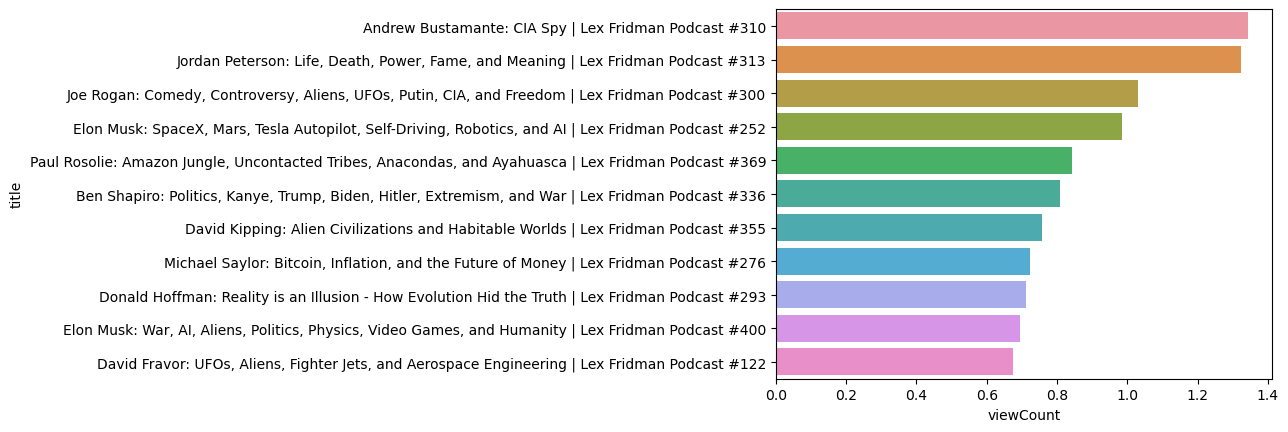

In [76]:
ax=sns.barplot(x='viewCount',y='title',data=df.sort_values('viewCount',ascending=False)[0:11])
plot=ax.set_xticklabels(ax.get_xticklabels(),rotation=360)

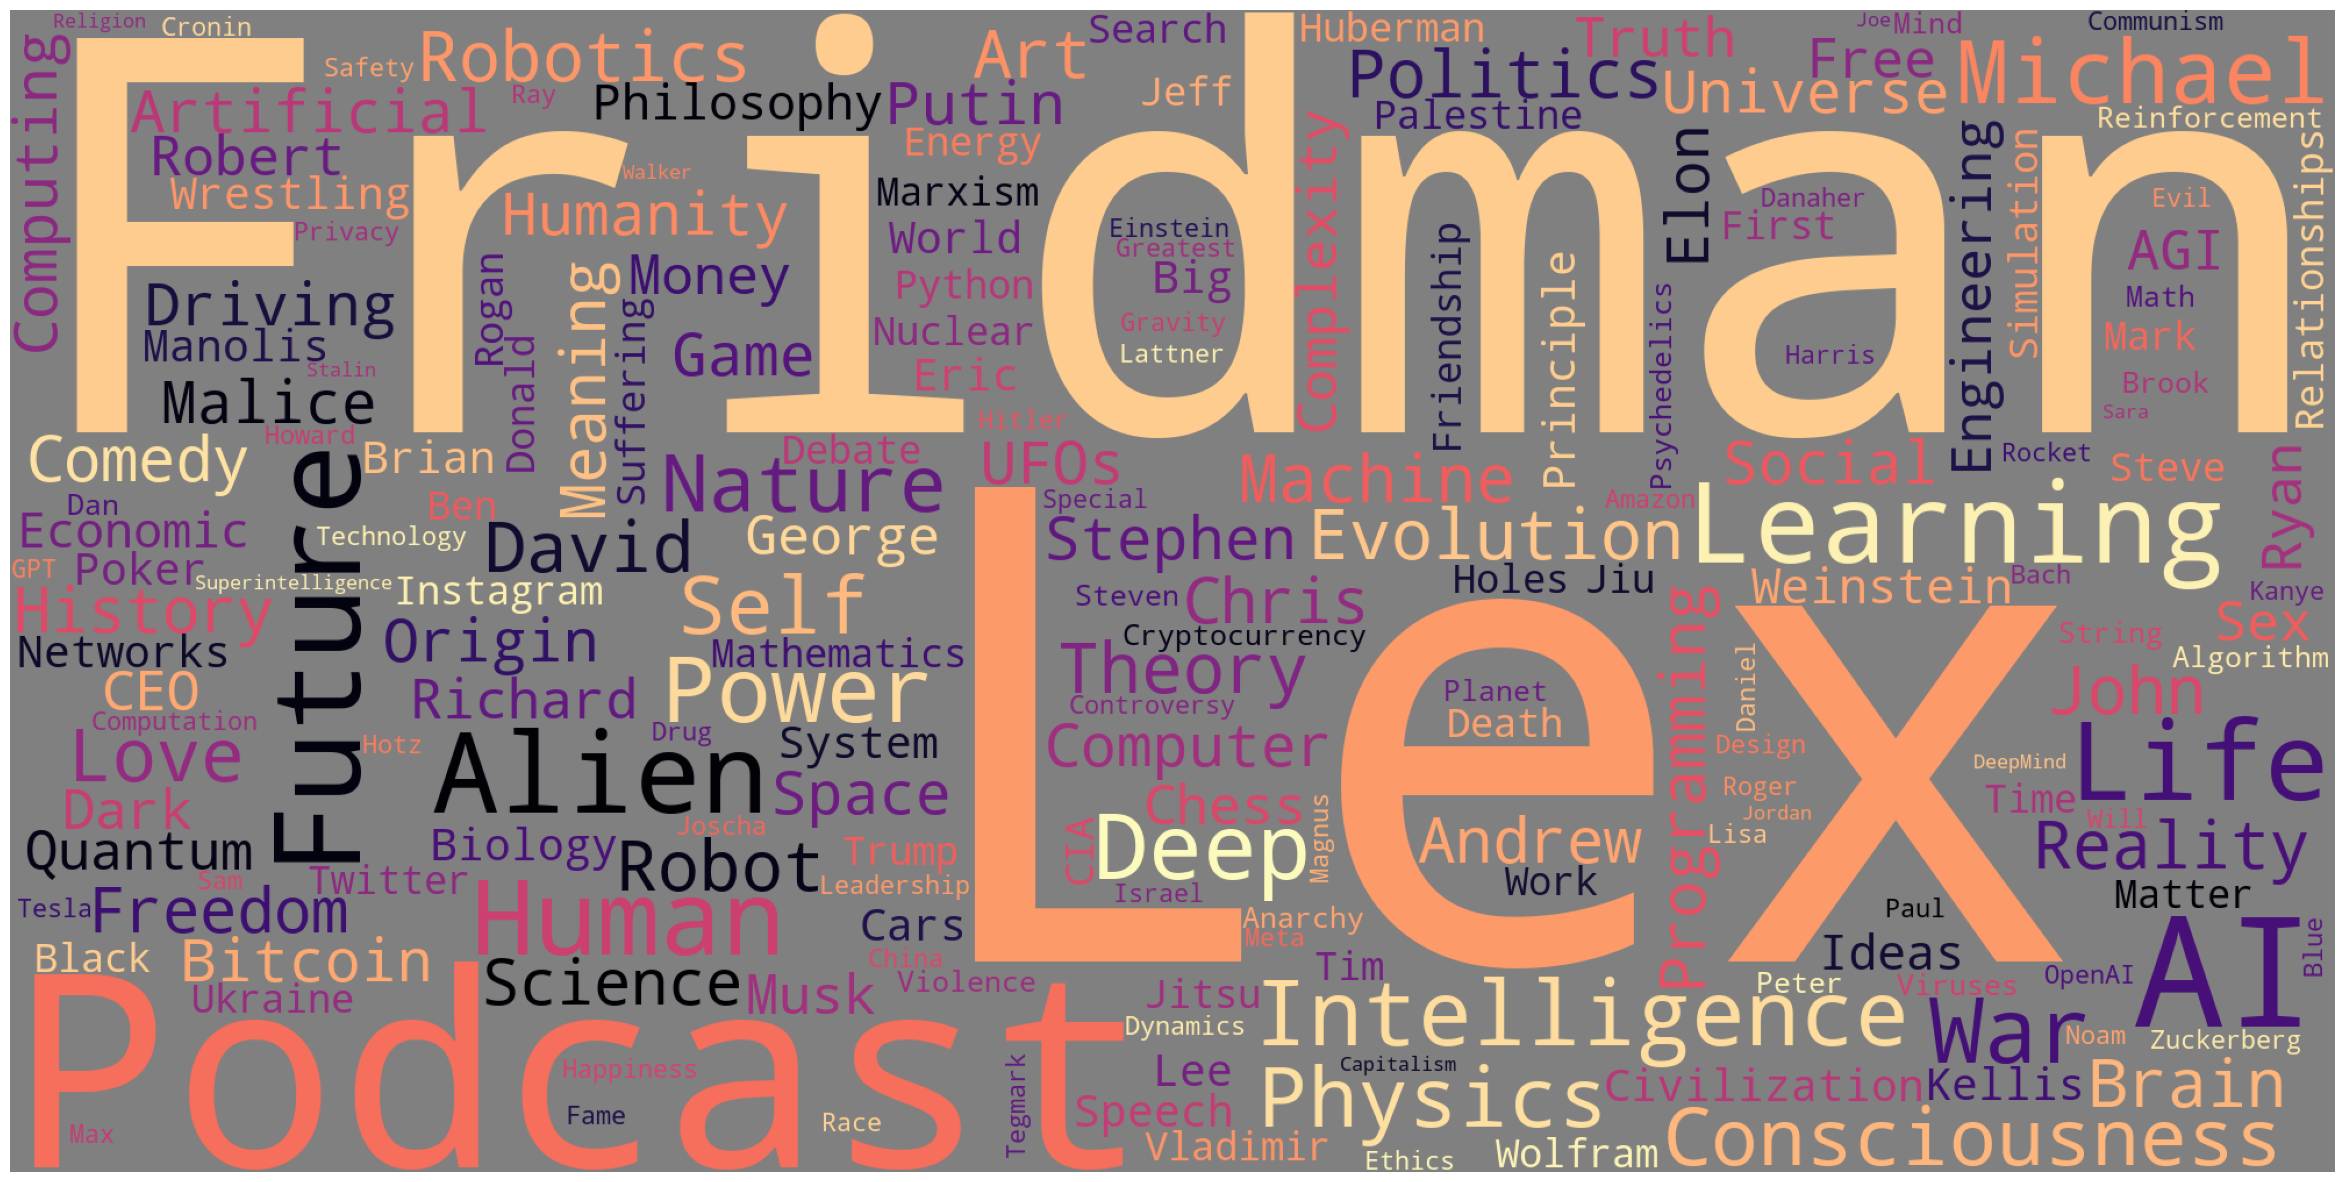

In [77]:
stop_words=set(stopwords.words('english'))
df['title_no_stopwords']=df['title'].apply(lambda x:[item for item in str(x).split() if item not in stop_words])
all_words= list([a for b in df['title_no_stopwords'].tolist() for a in b])
all_words_str=','.join(all_words)
def plotcloud(wordcloud):
    plt.figure(figsize=(30,20))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud=WordCloud(width=2000,height=1000,random_state=1,background_color='gray',colormap='magma',collocations=False).generate(all_words_str)
plotcloud(wordcloud)

# Linear regression

In [84]:
import statsmodels.api as sm
# Create X and y dataframes
X1 = df[['viewCount','commentCount','durationSec_1']]
y = df['likeCount']

# Add constant 
X1_sm1 = sm.add_constant(X1)

# Create model, fit, and print results
mod1 = sm.OLS(y,X1_sm1)
res1 = mod1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              likeCount   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1062.
Date:                Wed, 27 Dec 2023   Prob (F-statistic):          5.93e-189
Time:                        23:31:25   Log-Likelihood:                -4180.4
No. Observations:                 400   AIC:                             8369.
Df Residuals:                     396   BIC:                             8385.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7485.3429   1102.575      6.789      0.000    5317.711    9652.975
viewCount         0.0087      0.000     27.333      0.000       0.008       0.009
commentCount      2.2513      0.122     18.454      0.000       2.011       2.491
durationSec_1    -0.5849      0.125     -4.671      0.000      -0.831      -0.339
==============================================================================
Omnibus:                      116.964   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3424.256
Skew:                           0.540   Prob(JB):                         0.00
Kurtosis:                      17.293   Cond. No.                     5.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Logistic regression

In [88]:
df['caption'] = df['caption'].map({'true':1, 'false':0})

In [90]:
X4 = np.log(df[['viewCount']])
y_l = df[['caption']] 
X4_sm = sm.add_constant(X4)
# building the model and fitting the data 
log_reg = sm.Logit(y_l, X4_sm).fit() 
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.434684
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                caption   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 Dec 2023   Pseudo R-squ.:                  0.1126
Time:                        23:54:16   Log-Likelihood:                -173.87
converged:                       True   LL-Null:                       -195.93
Covariance Type:            nonrobust   LLR p-value:                 3.097e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6464      1.566     -6.801      0.000     -13.715      -7.578
viewCount      0.6819      0.113      6.039      0.000       0.461       0.903
==============================================================================
"""

In [91]:
np.exp(log_reg.params)

const        0.000024
viewCount    1.977717
dtype: float64

# Regression decision tree

In [98]:
from sklearn import tree
X = df[['viewCount','likeCount','commentCount']]
y = df['durationSec_1']
clf = tree.DecisionTreeRegressor( max_depth = 3)
clf = clf.fit(X, y)
clf

DecisionTreeRegressor(max_depth=3)

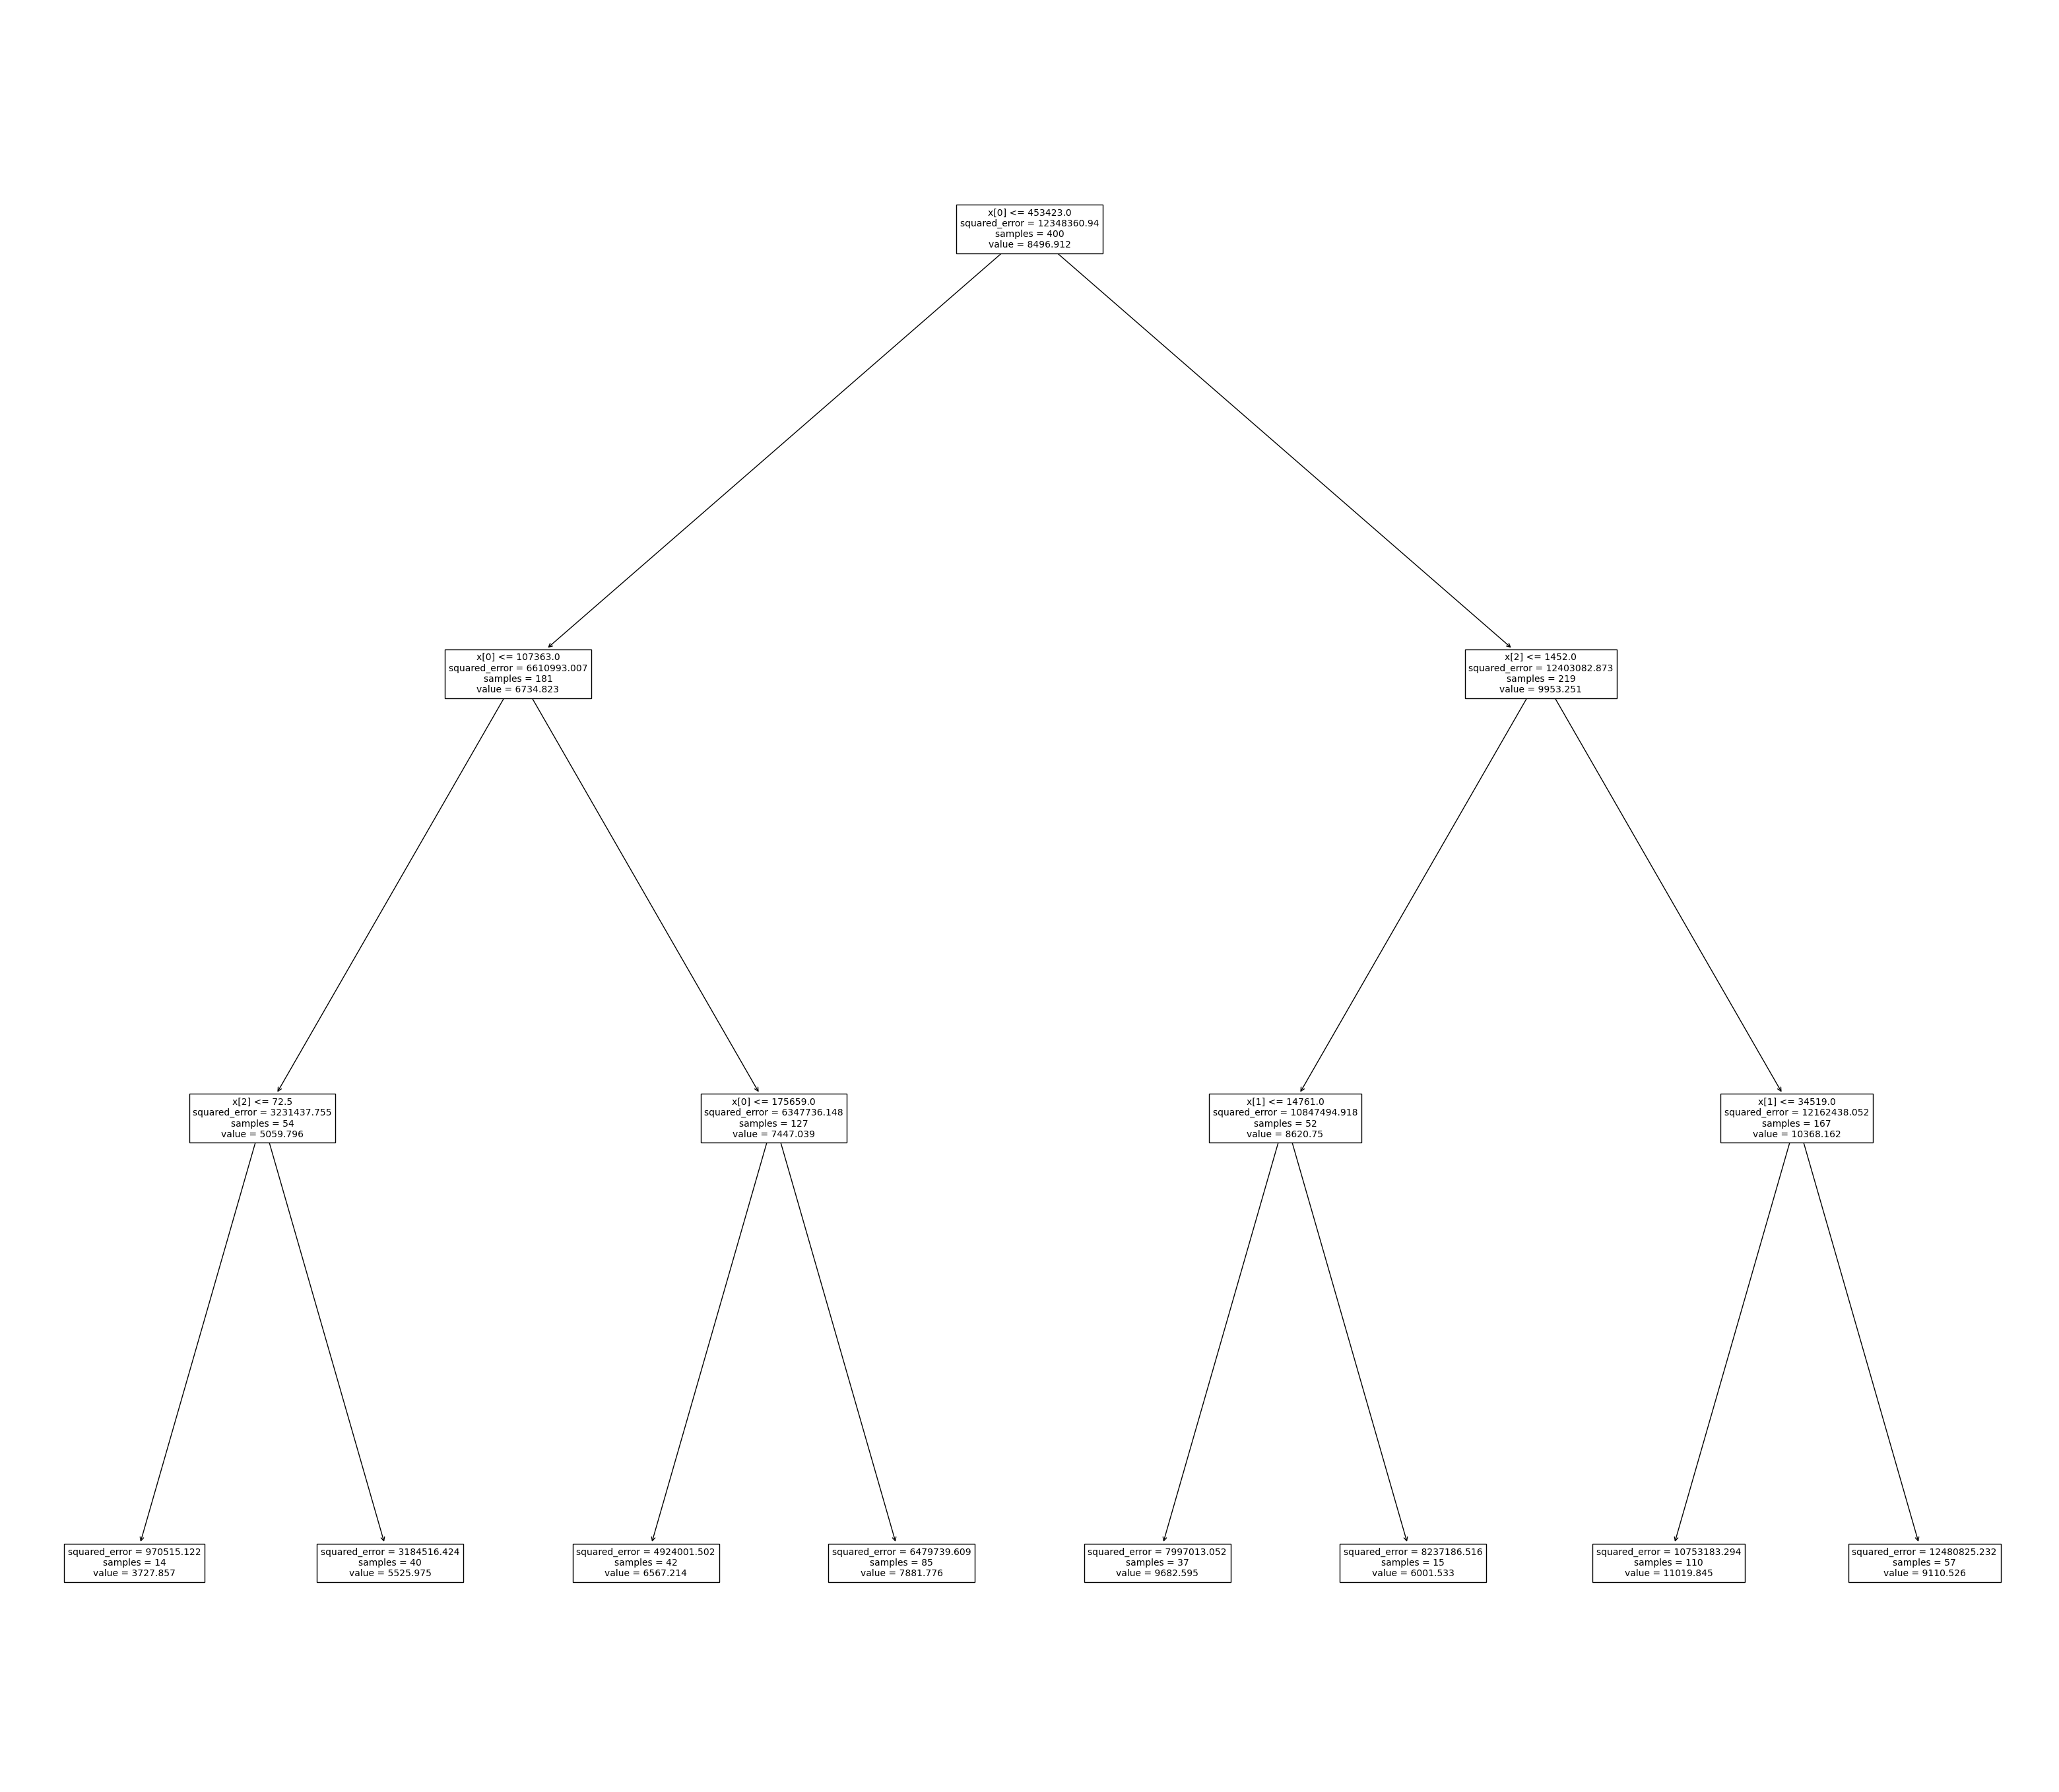

In [99]:
plt.figure(figsize=(40,35)) 
tree.plot_tree(clf, max_depth =3,  fontsize=10)
plt.show()

# Classification decision tree

In [100]:
# Create X and y dataframes
X1 = df[['viewCount']]
y = df['commentCount']

# Add constant 
X1_sm1 = sm.add_constant(X1)

# Create model, fit, and print results
mod1 = sm.OLS(y,X1_sm1)
res1 = mod1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           commentCount   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     327.4
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           7.89e-54
Time:                        00:38:05   Log-Likelihood:                -3825.6
No. Observations:                 400   AIC:                             7655.
Df Residuals:                     398   BIC:                             7663.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        573.0586    207.050      2.768      0.006     166.010     980.108
viewCount      0.0017   9.48e-05     18.094      0.000       0.002       0.002
==============================================================================
Omnibus:                      635.873   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           237324.976
Skew:                           8.577   Prob(JB):                         0.00
Kurtosis:                     121.090   Cond. No.                     2.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
df['commentRatio'] = df.commentCount/df.viewCount

In [104]:
df['commentRatio'] = pd.cut(df['commentRatio'],bins=[0,0.002, 1],
                            labels=[0,1])

In [107]:
X1 = df[['durationSec_1','likeCount','sentiment', "tf_idf"]]
y1 = df["commentRatio"]
clf1 = tree.DecisionTreeClassifier( max_depth = 3)
clf1= clf1.fit(X1, y1)
clf1

DecisionTreeClassifier(max_depth=3)

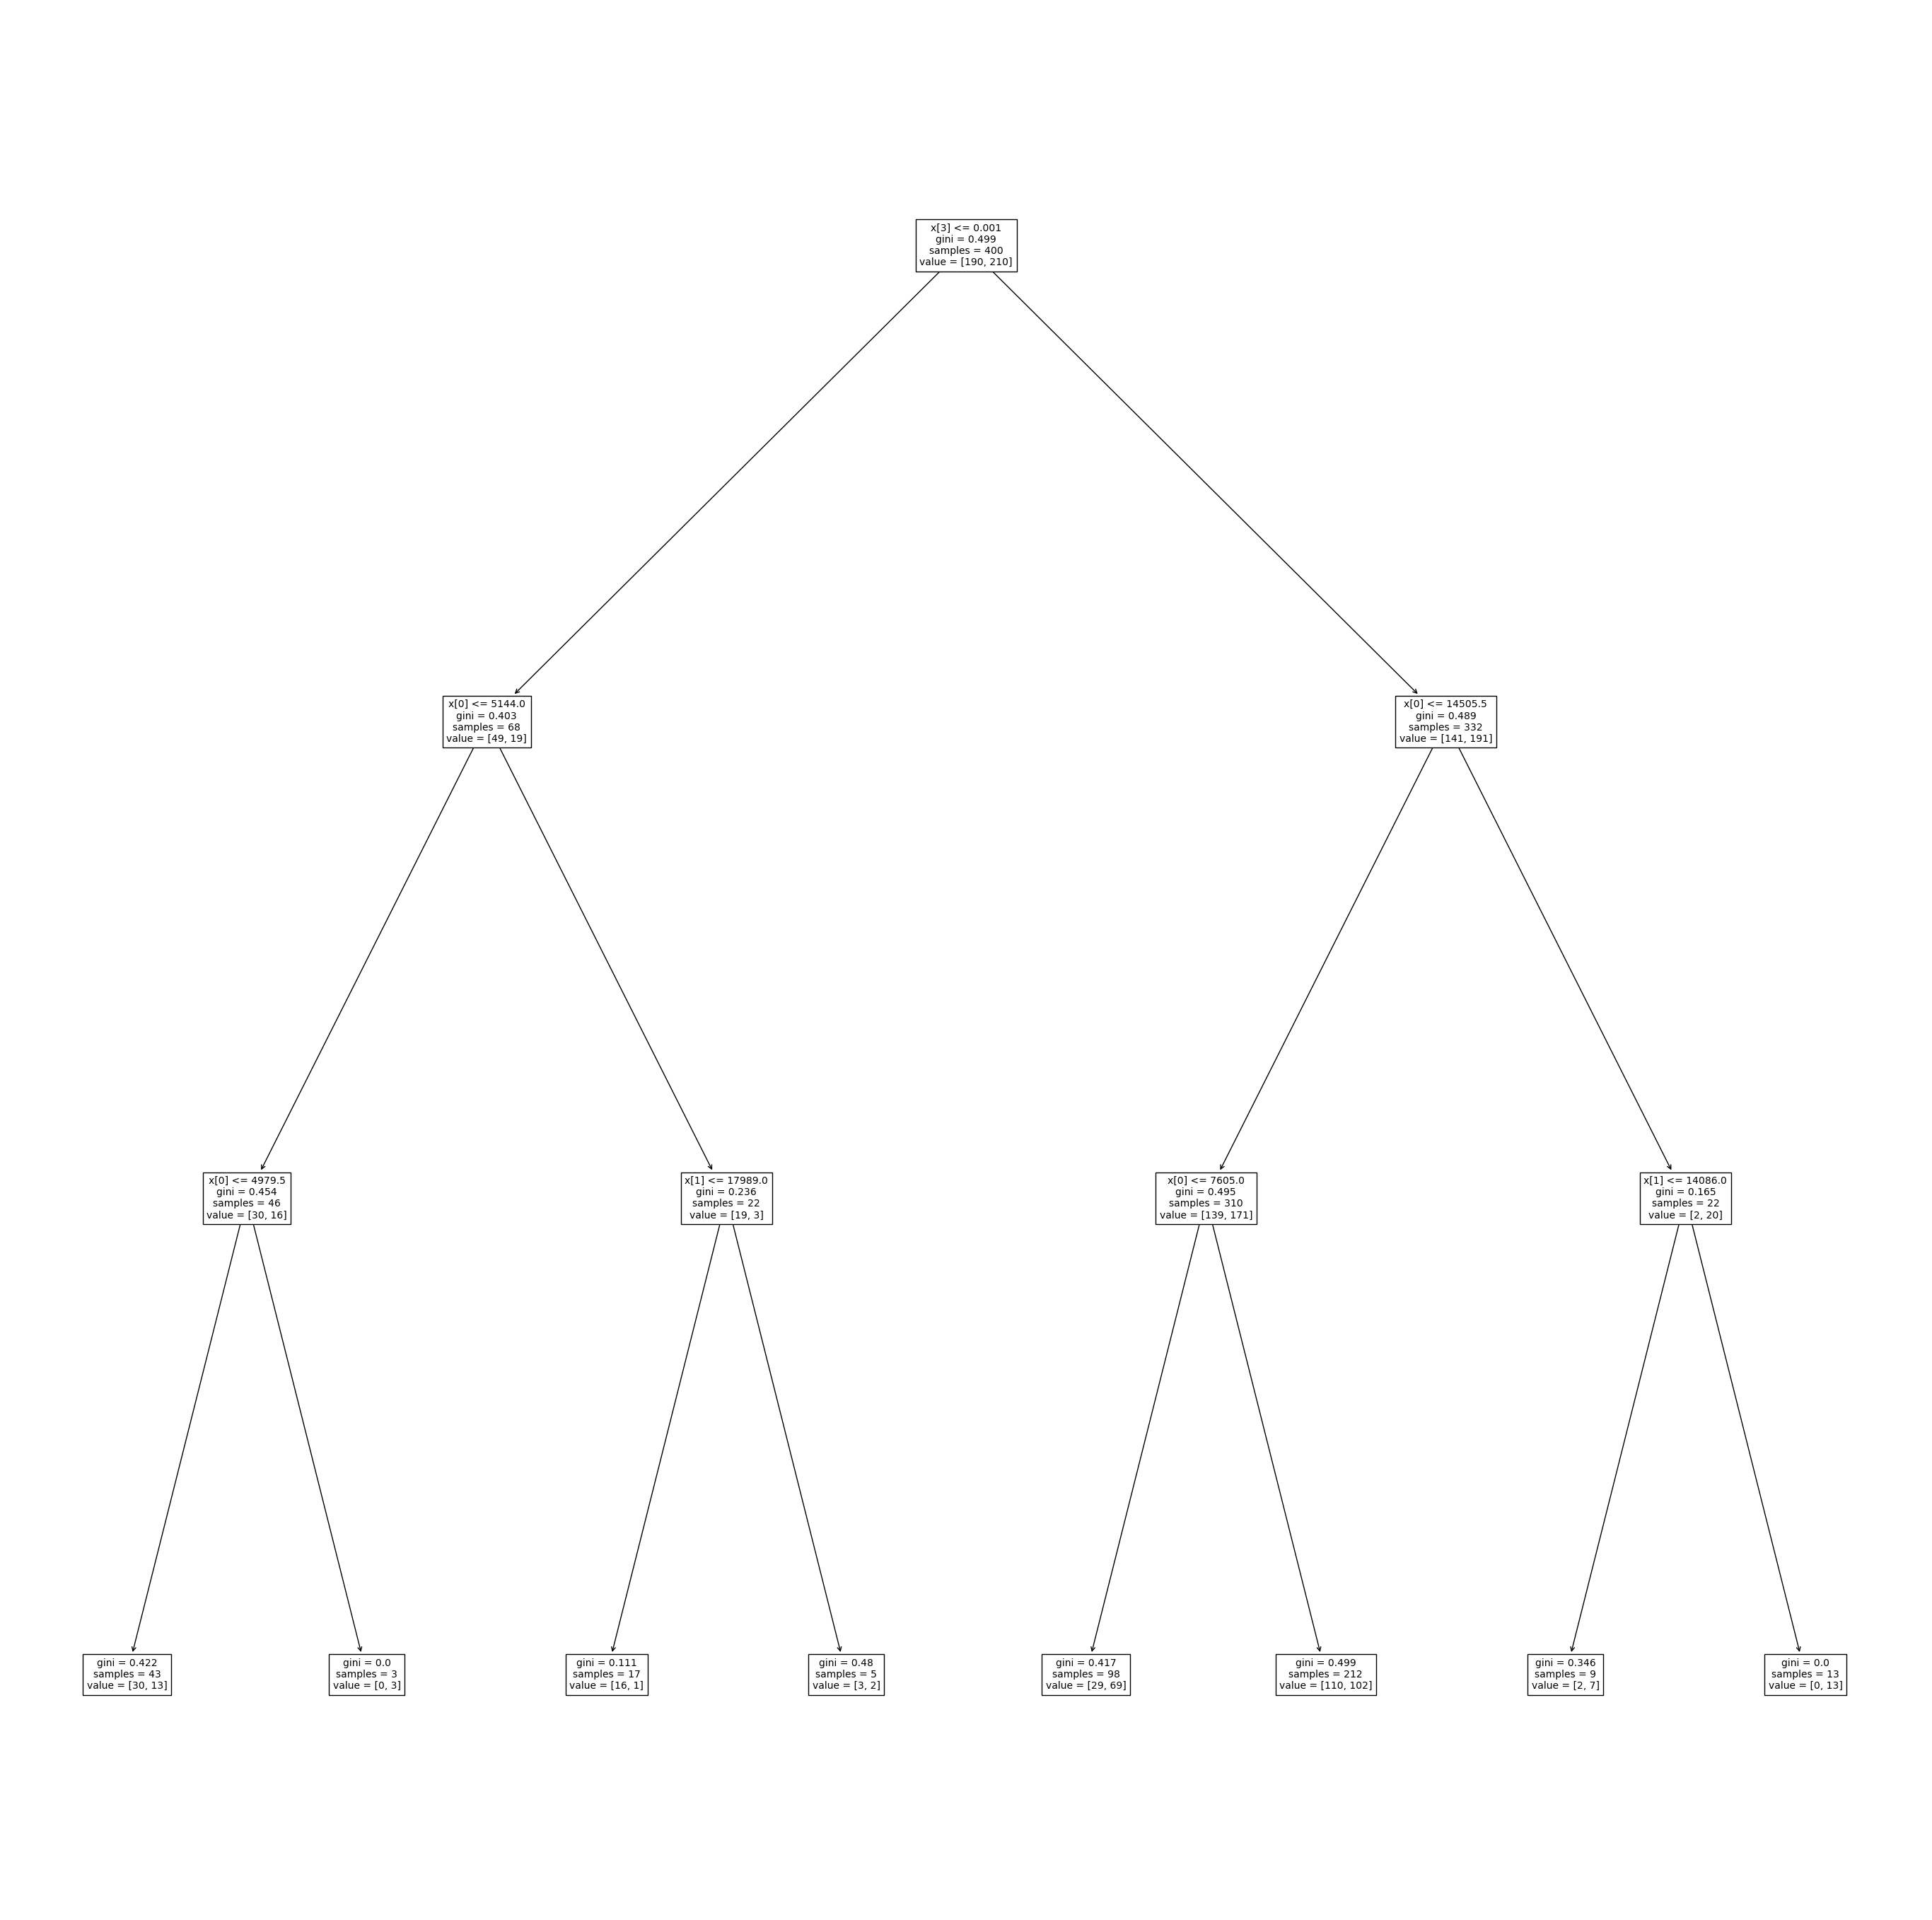

In [109]:
plt.figure(figsize=(35,35)) 
tree.plot_tree(clf1, max_depth =3,  fontsize=10)
plt.show()

# Confusion matrix and accuracy

In [110]:
y1_pre = clf1.predict(X1)
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y1, y1_pre)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

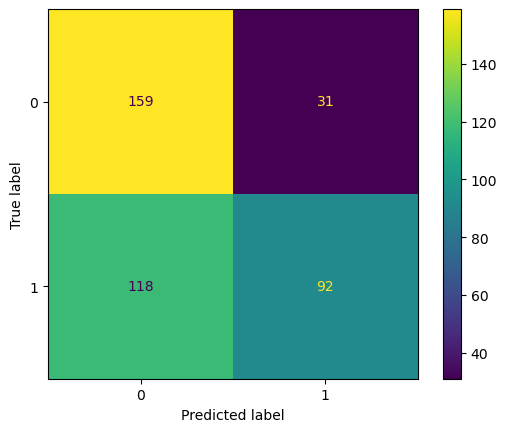

In [111]:
cm_display.plot()
plt.show()

In [112]:
Accuracy = metrics.accuracy_score(y1, y1_pre)
Accuracy

0.6275

In [123]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.25, random_state=123)

In [124]:
clf1_1= clf1.fit(X1_train, y1_train)
clf1_1

DecisionTreeClassifier(max_depth=3)

In [125]:
y1_1_pre = clf1_1.predict(X1_train)
y1_2_pre = clf1_1.predict(X1_test)

In [126]:
Accuracy_train = metrics.accuracy_score(y1_train, y1_1_pre)
Accuracy_train

0.68

In [127]:
Accuracy_test = metrics.accuracy_score(y1_test, y1_2_pre)
Accuracy_test

0.56